In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import os
import PIL.Image as Image
from typing import Tuple
from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import cv2
import LookGenerator.datasets.transforms as custom_transforms

In [33]:
image = Image.open(r"C:\Users\DenisovDmitrii\Desktop\train\image\00000_00.jpg")
img_model = torch.tensor(np.asarray(image, dtype=np.float32)[..., np.newaxis].T)


In [31]:
transform_output = transforms.Compose([
    transforms.Resize((256, 192)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])
model = UNet(in_channels=3, out_channels = 1)

In [32]:
model = load_model(model,
                       r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session20' + "\\"
                   + "unet_epoch_14_0.00028177894976471506.pt")
modelled = model(image)
modelled_img = to_array_from_model_bin_transpose(modelled)
plt.imshow(modelled_img)

TypeError: conv2d() received an invalid combination of arguments - got (JpegImageFile, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!JpegImageFile!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!JpegImageFile!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)


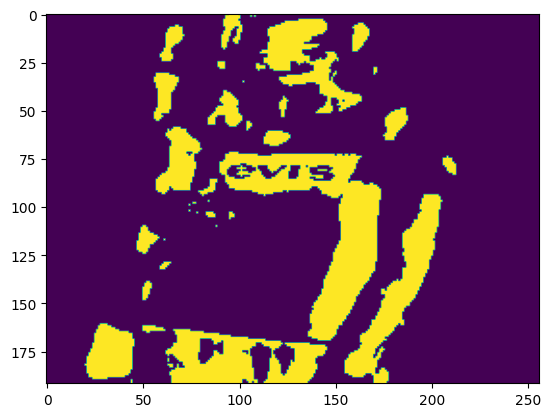

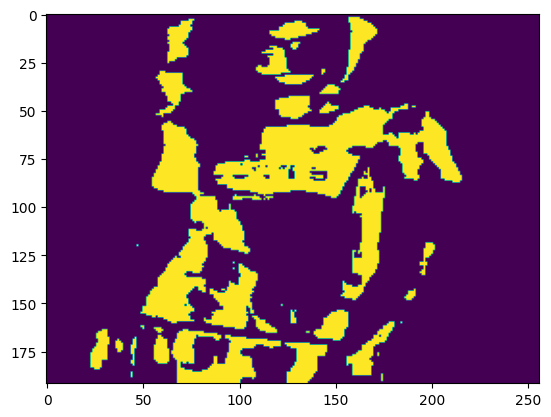

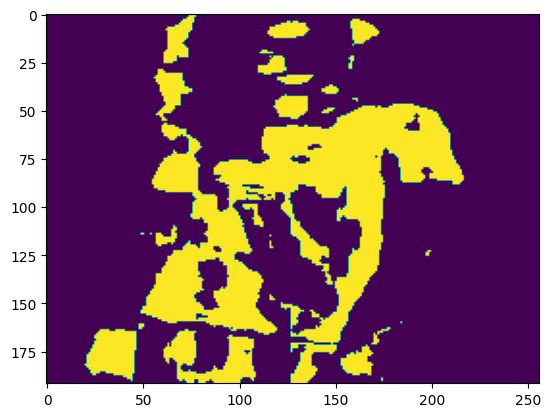

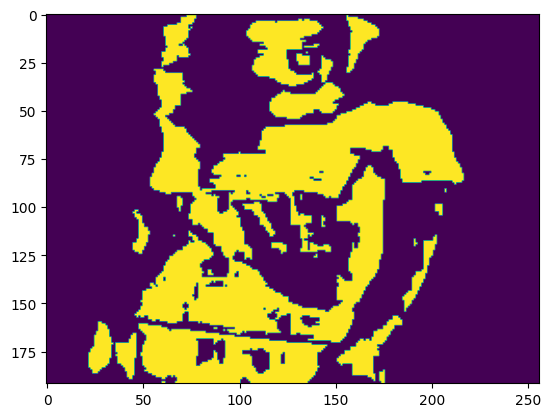

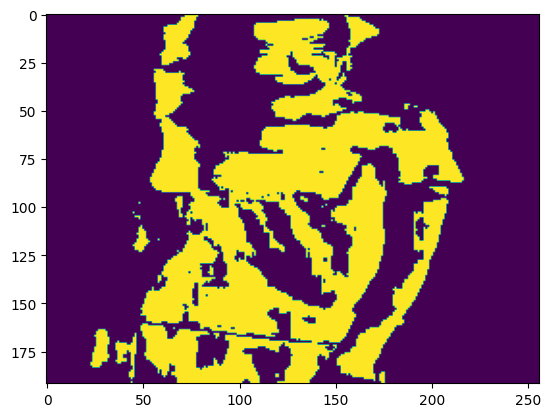

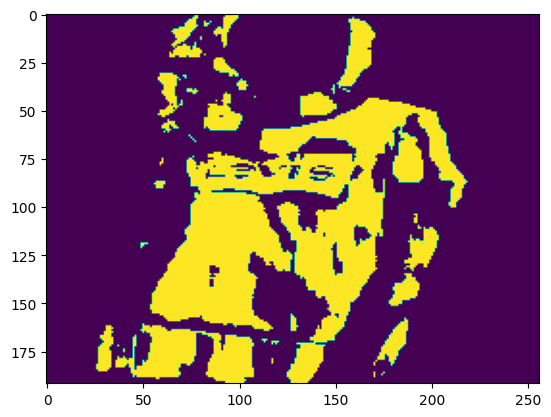

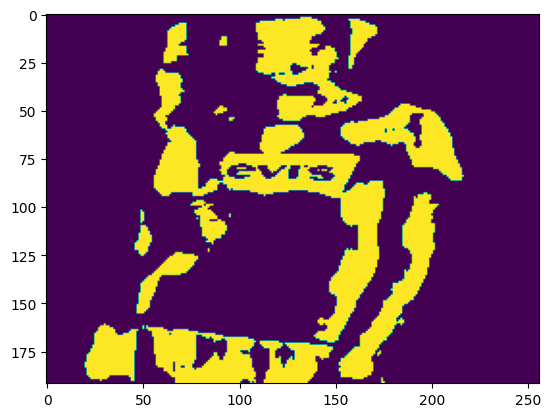

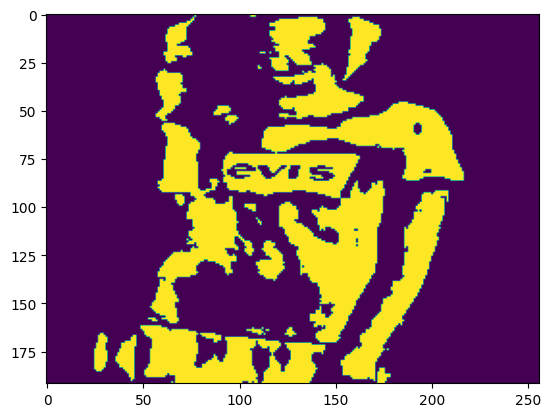

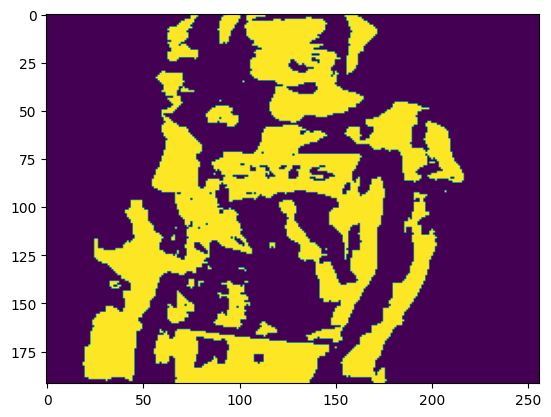

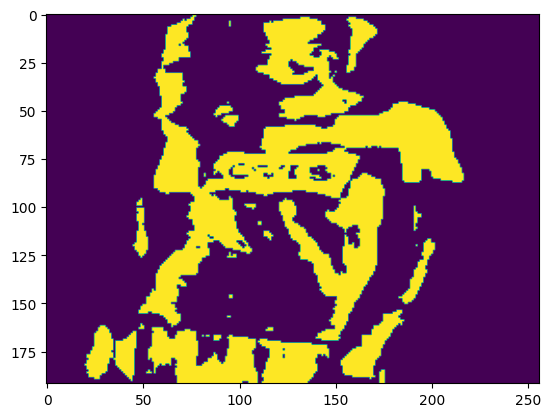

In [ ]:
url = r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session20\2'
list_files = os.listdir(url)
for file in list_files:
    model = load_model(model, url + "\\" + file)
    seg = model(img_model)
    seg = transform_output(seg.detach())
    plt.imshow(seg.numpy()[0, 0, :, :].T)
    plt.show()



In [36]:
list_files

['unet_epoch_0_0.0004146995936827221.pt',
 'unet_epoch_10_0.00013559024805313822.pt',
 'unet_epoch_11_0.0001363196216377635.pt',
 'unet_epoch_1_0.0002299497680693186.pt',
 'unet_epoch_2_0.00019595566830549476.pt',
 'unet_epoch_3_0.0002449564916001321.pt',
 'unet_epoch_4_0.00015042741122639293.pt',
 'unet_epoch_5_0.00013543147476519738.pt',
 'unet_epoch_6_0.0001545024621101852.pt',
 'unet_epoch_7_0.0001113592537013435.pt',
 'unet_epoch_8_9.441707502215434e-05.pt',
 'unet_epoch_9_0.0001528911620109777.pt']